Lecture: AI I - Advanced 

Previous:
[**Chapter 0: Prerequisites**](../00_prerequisites/REWADME.md)

---

# Chapter 1.1: Neuron

- [Artificial Neuron](#artificial-neuron)
- [Activation Functions](#activation-functions)
- [Multi Layer Perceptron](#multi-layer-perceptron)

**Artificial Neural Networks (ANNs)** represent a fundamental paradigm shift in machine learning: instead of manually engineering features and designing rules, we build systems that learn representations directly from data. Inspired by the structure of biological brains—though the analogy should not be taken too literally—ANNs consist of interconnected computational units called neurons that process information through weighted connections. What makes neural networks particularly powerful is their ability to automatically discover hierarchical patterns: lower layers might detect simple features (like edges in images), while deeper layers combine these into increasingly abstract concepts (like textures, parts, and eventually entire objects). This automatic feature learning distinguishes deep learning from classical machine learning methods like SVMs or Random Forests, which require domain experts to design appropriate features manually. Since the 2010s, ANNs have achieved breakthrough performance in tasks ranging from image recognition and natural language processing to game playing and scientific discovery—largely enabled by three factors: massive datasets, powerful GPU hardware, and algorithmic innovations in training deep networks.

The fundamental building block of any neural network is the **artificial neuron**, which we'll explore in detail below.

## Artificial Neuron

![neuron](data/01_basics/neuron.png)

This diagram illustrates the three fundamental operations of an artificial neuron, which execute sequentially from left to right:

### 1. Transfer Function (Aggregation)

The neuron receives multiple input signals $x_1, x_2, x_3, \ldots, x_n$​. Each input is connected to a weight $W_i$​ that determines the importance of that input. Large weights amplify a signal, while small weights dampen it.

The **Transfer Function** computes the weighted sum of all inputs plus a bias term $b$:

$$z=\sum_{i=1}^n W_i \cdot x_i + b = W_1 x_1 + W_2 x_2 + \cdots + W_n x_n + b$$

This is a linear transformation that combines all input information into a single scalar $z$. The bias allows the neuron to shift the decision boundary.

### 2. Activation Function (Non-Linearity)

The **Activation Function $f(\cdot)$** applies a non-linear transformation to $z$:

$$a = f(z)$$

**Why is this necessary?** Without an activation function, even a deep network would be just a composition of linear operations – therefore still linear. Only non-linearity enables neural networks to learn complex patterns.

Common activation functions:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh

### 3. Output Function

The Output Function produces the final output signal $y$. In most cases, this is simply the identity function:

$$y = g(a) = a$$

where the output directly equals the activation. However, in special cases (e.g., multi-class classification), an additional transformation like Softmax may be applied here.

### In Summary: The Complete Forward Pass

$$y = g(f(\sum_{i=1}^n W_i \cdot x_i + b))$$

where $g(\cdot)$ is typically the identity function $g(a)=a$, simplifying to:

$$y = f(\sum_{i=1}^n W_i \cdot x_i + b)$$

**In words**: The neuron multiplies each input by its weight, sums them all up (plus bias), applies an activation function, applies an output function (usually identity), and outputs the result.

**During training**, the weights $W_i$ and bias $b$ are adjusted via backpropagation to minimize the loss. The inputs $x_i$ and the activation function $f$ remain fixed.

## Activation Functions

Now that we understand the structure of a neuron, you might have noticed that we mentioned several activation functions — **Sigmoid, ReLU, Tanh, Softmax** — but didn't explain when to use which one or why these specific functions exist. This choice is far from arbitrary. The activation function fundamentally determines:

* How well your network can learn (gradient flow during backpropagation)
* How fast it trains (computational efficiency)
* What problems it can solve (expressiveness and output constraints)

Choosing the wrong activation function can mean the difference between a model that trains in hours versus one that never converges at all. In the next section, we'll explore the most important activation functions in detail, understand their mathematical properties, and learn exactly when to use each one in hidden layers versus output layers.

### Why Do We Need Activation Functions?

Without activation functions, a neural network would be nothing more than a series of linear transformations. Consider a two-layer network without activations:

$$y=W_2​(W_1​x+b_1​)+b_2​=(W_2​W_1​)x+(W_2​b_1​+b_2​)=W^′x+b^′$$

No matter how many layers we stack, the result is still just a linear function! This means the network could only learn linear decision boundaries—no better than simple linear regression. Activation functions introduce non-linearity, enabling networks to approximate arbitrarily complex functions (Universal Approximation Theorem).

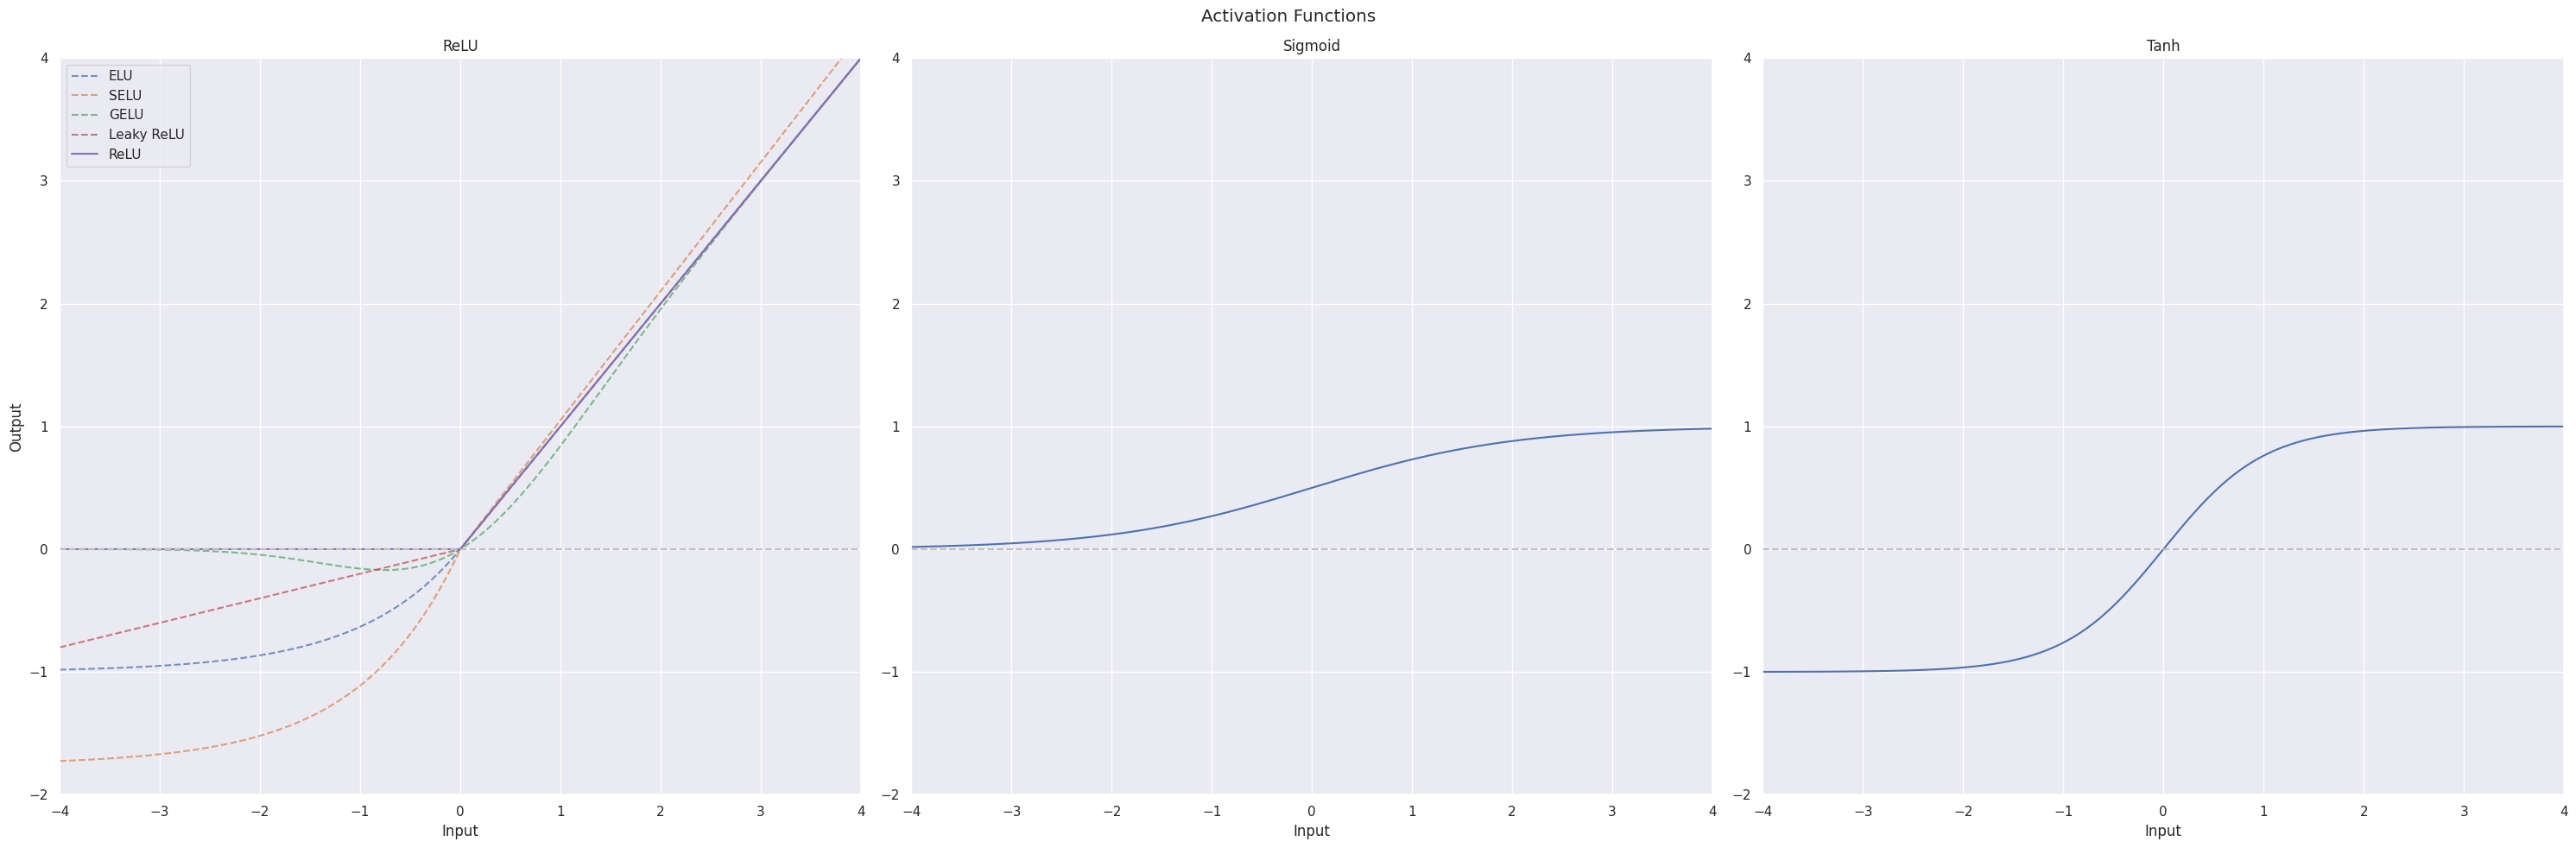

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from torch.functional import F

input = torch.linspace(-4, 4, 1_000)


sns.set_theme(style="darkgrid")
fig, (relu_ax, sigmoid_ax, tanh_ax) = plt.subplots(1, 3, figsize=(30, 10))
relu_ax.plot(input, F.elu(input), label="ELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.selu(input), label="SELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.gelu(input), label="GELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.leaky_relu(input, 0.2), label="Leaky ReLU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.relu(input), label="ReLU")
relu_ax.axhline(0, color="0.75", linestyle="--")
relu_ax.set(ylabel='Output', xlabel='Input', title="ReLU", xlim=(-4, 4), ylim=(-2, 4))

sigmoid_ax.plot(input, F.sigmoid(input), label="Sigmoid")
sigmoid_ax.axhline(0, color="0.75", linestyle="--")
sigmoid_ax.set(xlabel='Input', title="Sigmoid", xlim=(-4, 4), ylim=(-2, 4))

tanh_ax.plot(input, F.tanh(input), label="Tanh")
tanh_ax.axhline(0, color="0.75", linestyle="--")
tanh_ax.set(xlabel='Input', title="Tanh", xlim=(-4, 4), ylim=(-2, 4))

relu_ax.legend()
fig.suptitle("Activation Functions")
fig.tight_layout()

### ReLU (Rectified Linear Unit)

**Mathematical Definition:** $ReLU(z) = \max(0, z) = \begin{cases} z & \text{if } z > 0 \\ 0 & \text{otherwise} \end{cases}$

**Output Range:** $[0, \infty)$

**Properties:**
* Piecewise linear, computationally trivial
* Introduced sparsity (many neurons output exactly 0)

**Advantages:**
* **No vanishing gradient** for positive values (gradient = 1)
* **Computationally efficient**: Just a simple thresholding operation
* **Accelerates convergence**: Empirically 6x faster than sigmoid/tanh 
* **Biological plausibility**: Neurons either fire or don't fire

**Disadvantages:**
* **Dead ReLU Problem**: Neurons can "die" if they consistently output 0, never updating their weights (gradient = 0)
* **Not zero-centered**: All outputs are positive
* **Unbounded output**: Can lead to exploding activations

**When to Use:**
* Hidden layers in most modern architectures (default choice
* Don't use in Output layer for classification (use softmax/sigmoid)
* Output layer for regression with non-negative values

**Variants:**
* Leaky ReLU: $\max(0.01z, z)$ - small gradient for negative values to prevent dead neurons
* ELU: Smooth curve for negative values, zero-centered mean activations
* GELU: Gaussian error linear unit, used in transformers
* SELU: Self-normalizing, maintains mean and variance
---
### Sigmoid

**Mathematical Definition:** $\sigma(z) = \frac{1}{1 + e^{-z}}$

**Output Range:** $(0, 1)$

**Properties:**
* Smooth, S-shaped curve
* Output can be interpreted as a probability
* Historically popular but now rarely used in hidden layers

**Advantages:**
* Clear probabilistic interpretation for binary classification
* Differentiable everywhere

**Disadvantages:**
* **Vanishing Gradient Problem**: For very large or small inputs ($∣z∣>5|$), the gradient approaches zero, making learning extremely slow in deep networks
* **Not zero-centered**: Outputs are always positive, which can slow down gradient descent
* **Computationally expensive**: Requires exponential calculation

**When to Use:**
* Output layer for binary or multi-class classification (single neuron outputting probability)
* Don't use in hidden layers (use ReLU instead)
---
### Tanh

**Mathematical Definition:** $tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

**Output Range:** $(-1, 1)$

**Properties:**
* Similar S-shape to sigmoid, but zero-centered
* Stronger gradients than sigmoid

**Advantages:**
* **Zero-centered**: Helps with gradient flow during backpropagation
* Stronger gradients than sigmoid in the active region

**Disadvantages:**
* Still suffers from vanishing gradient problem for extreme values
* Computationally more expensive than ReLU

**When to Use:**
* Hidden layers when you need zero-centered outputs (though ReLU is more common today)
* Recurrent Neural Networks (LSTMs, GRUs) where zero-centered activations are beneficial
* Don't use in output layer (use softmax/sigmoid/linear for most tasks instead)
---
### Softmax

**Mathematical Definition:** For a vector $\mathbf{z} = [z_1, z_2, \ldots, z_K]$ softmax is defined as $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$

**Output Range:** $(0, 1)$ for each class, $\sum_{i=1}^K \text{softmax}(z_i) = 1$

**Properties:**
* Converts a vector of real numbers into a probability distribution
* Larger input values get exponentially more weight
* Temperature parameter $T$ can control distribution sharpness: $\text{softmax}(z_i/T)$

**Advantages:**
* **Probabilistic interpretation**: Each output represents $P(\text{class}_i | x)$
* **Differentiable**: Works seamlessly with gradient descent
* **Mutually exclusive classes**: Outputs sum to 1

**Disadvantages:**
* **Computationally expensive**: Requires exponentials for all classes
* **Sensitive to outliers**: Extreme values dominate due to exponential
* **Not suitable for multi-label** problems (use multiple sigmoids instead)

**When to Use:**
* Output layer for multi-class classification (mutually exclusive classes)
* Don't use in hidden layers (computationally wasteful and unnecessary)
* Don't use for multi-label classification (use sigmoid instead)
---
### Decision Guide: Which Activation Function?

| Layer Type | Task | recommended Activation Function |
|------------|------|---------------------------------|
| Hidden     | General purpose | ReLU (default), Leaky ReLU, ELU |
| Hidden     | Zero-centered needed | Tanh |
| Hidden     | Prevent dead neurons | Leaky ReLU, ELU, ... |
| Output     | Binary classification | Sigmoid |
| Output     | Multi-class classification | Softmax |
| Output     | Multi-label classification | Sigmoid (per class) |
| Output     | Regression (unbounded) | Linear (identity) |
| Output     | Regression (non-negative) | ReLU |


### Showcase: A network to learn the absolute value function

Let's build a simple network that demonstrates how two neurons with ReLU activation can learn to compute the absolute value function $|x|$, which "inverts" (makes positive) all negative inputs.

In [2]:
import torch.nn as nn
import torch.nn.functional as F


class AbsoluteValueMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_hidden = nn.Linear(1, 2)
        self.fc_output = nn.Linear(2, 1)

        with torch.no_grad():
            self.fc_hidden.weight[0, 0] = 1.0   
            self.fc_hidden.weight[1, 0] = -1.0  
            self.fc_hidden.bias[0] = 0.0
            self.fc_hidden.bias[1] = 0.0

            self.fc_output.weight[0, 0] = 1.0
            self.fc_output.weight[0, 1] = 1.0
            self.fc_output.bias[0] = 1.0

            for param in self.parameters():
                param.requires_grad = False

    def forward(self, x):
        y = F.relu(self.fc_hidden(x))
        y = self.fc_output(y)
        return y

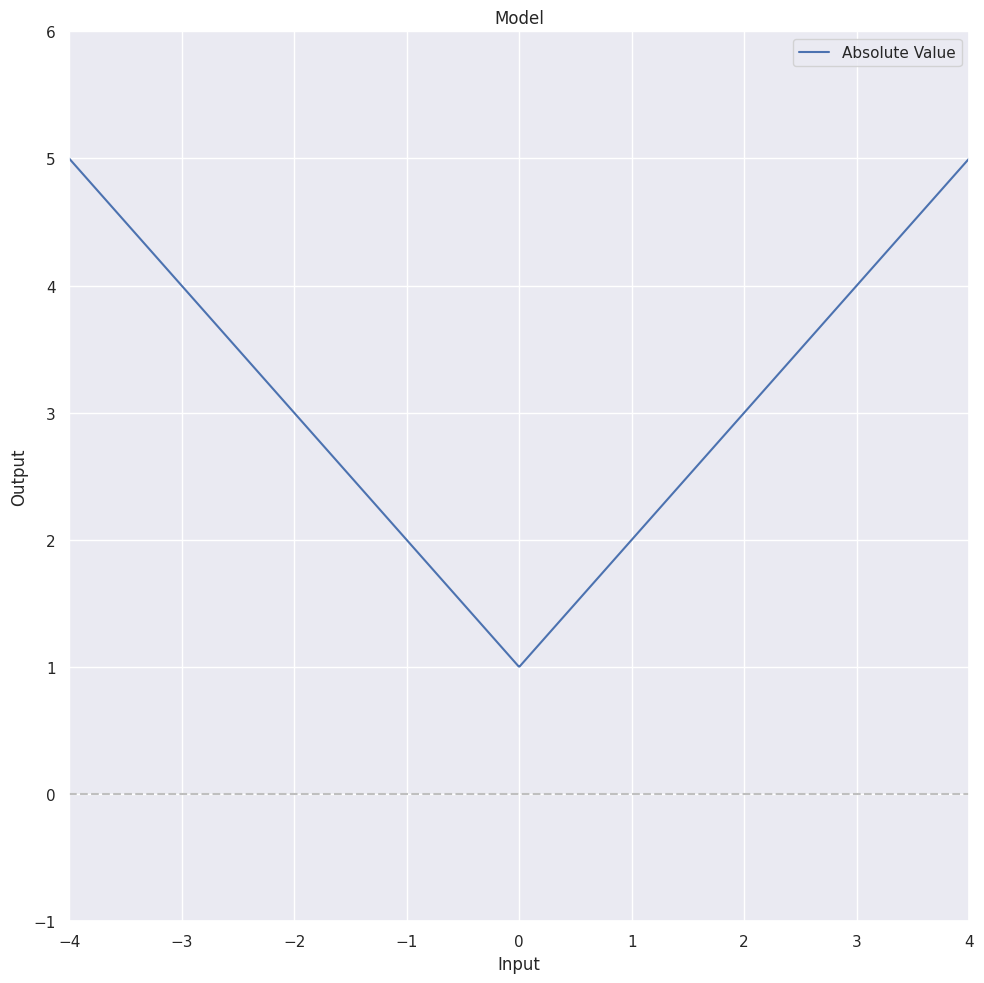

In [3]:
model = AbsoluteValueMLP()
input = torch.linspace(-4, 4, 1_000)

with torch.no_grad():
    output = model(input.unsqueeze(1))

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(input, output, label="Absolute Value")
ax.axhline(0, color="0.75", linestyle="--")
ax.set(ylabel='Output', xlabel='Input', title="Model", xlim=(-4, 4), ylim=(-1, 6))

ax.legend()
fig.tight_layout()

## Multi Layer Perceptron

Now that we understand individual neurons and activation functions, we're ready to combine them into something far more powerful: Multi-Layer Perceptrons (MLPs). A single neuron, no matter how sophisticated its activation function, can only learn linear decision boundaries (or simple non-linear transformations). But when we stack neurons into layers and connect them together, something remarkable happens — the network gains the ability to learn arbitrarily complex functions.

In this section, we'll explore:
* How to architect networks with multiple layers
* How to measure prediction quality with **loss functions**
* How to optimize these networks using **gradient descent**
* How **backpropagation** computes gradients efficiently through deep networks

This is where the pieces come together to form a complete, trainable neural network.

### Architecture

A **Multi-Layer Perceptron** consists of:
1. **Input Layer**: Raw features (not trainable, just passes data forward)
2. **Hidden Layer(s)**: One or more layers of neurons that learn representations
3. **Output Layer**: Produces final predictions (e.g., class probabilities, regression outputs)

**Key Insight**: Each layer transforms the data into a new representation. Early layers learn simple features, deeper layers learn increasingly abstract concepts.

In [4]:
class RegressionMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

### Loss Functions: Measuring Prediction Quality

A **loss function** (or **cost function**) quantifies how wrong our predictions are. The goal of training is to **minimize this loss**.

Properties of Good Loss Functions
1. **Always non-negative**: $\mathcal{L} \geq 0$
2. **Zero at perfect prediction**: $\mathcal{L} = 0$ when $\hat{y} = y$
3. **Differentiable**: We need gradients for backpropagation
4. **Convex (ideally)**: Makes optimization easier
---
#### 1. Mean Squared Error (MSE) – For Regression

**Use case**: Predicting continuous values (house prices, temperature, etc.)

**Mathematical Definition:** $\mathcal{L}_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Intuition**: Penalizes predictions quadratically—large errors are punished heavily.

---
#### 2. Binary Cross-Entropy (BCE) – For Binary Classification

**Use case**: Two-class problems (spam/not spam, disease/healthy)

**Mathematical Definition:** $\mathcal{L}_{\text{BCE}} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$

Where:
- $y_i \in \{0, 1\}$ (true labels)
- $\hat{y}_i \in (0, 1)$ (predicted probabilities from sigmoid)

**Intuition**: Heavily penalizes confident wrong predictions.

---
#### 3. Cross-Entropy Loss – For Multi-Class Classification

**Use case**: Multiple mutually exclusive classes (digit recognition, image classification)

**Mathematical Definition:** $\mathcal{L}_{\text{CE}} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})$

Where:
- $y_{i,c}$ = 1 if sample $i$ is class $c$, else 0 (one-hot encoded)
- $\hat{y}_{i,c}$ = predicted probability for class $c$ (from softmax)
- $C$ = number of classes

**Simplified form** when $y$ is class index (not one-hot): 
$$\mathcal{L}_{\text{CE}} = -\log(\hat{y}_{\text{true class}})$$

### Loss Function Comparison

| Loss Function | Use Case | Output Layer | Target Format | PyTorch |
|----------------|----------|--------------|---------------|---------|
| Mean Squared Error (MSE) | Regression | Linear (no activation) | Continuous values | `nn.MSELoss()` |
| Binary Cross-Entropy (BCE) | Binary Classification | Sigmoid | Binary labels (0/1) | `nn.BCELoss()` |
| Cross-Entropy Loss | Multi-Class Classification | No activation (logits) | One-hot or class indices | | `nn.CrossEntropyLoss()` |

In [5]:
criterion = nn.MSELoss()

predictions = torch.tensor([250.0, 320.0, 180.0, 290.0])
targets = torch.tensor([260.0, 310.0, 190.0, 285.0]) 

loss = criterion(predictions, targets)
print(f"MSE Loss: {loss.item():.4f}")

MSE Loss: 81.2500


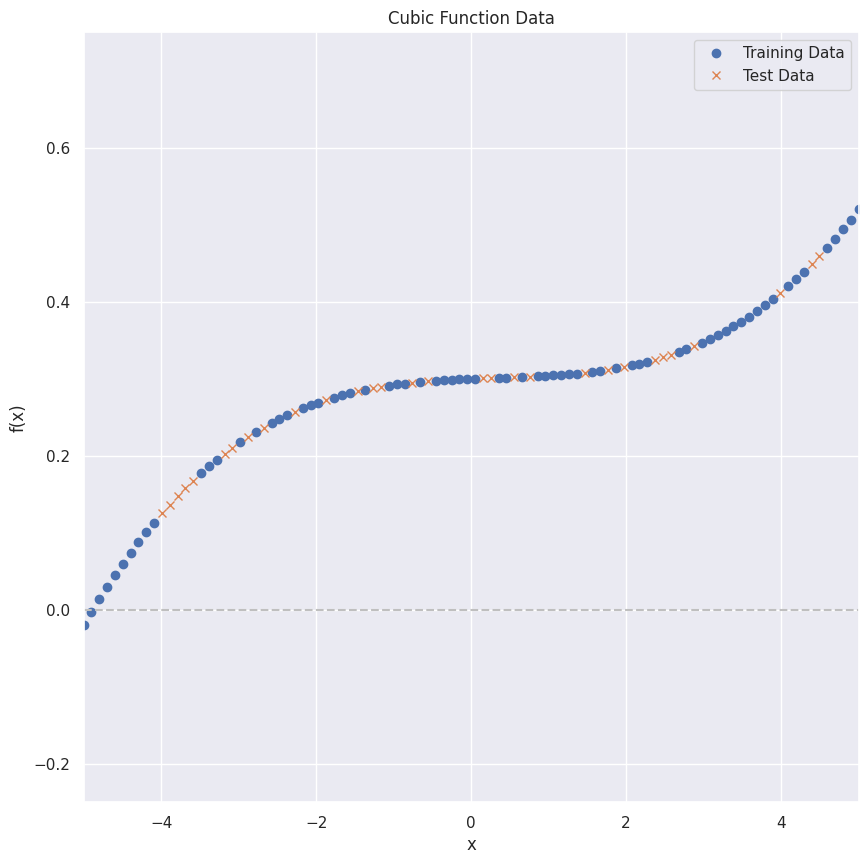

In [32]:
def f(x):
    return 0.002*(x**3-x**2+2*x)+0.3

xs = torch.linspace(-5,5, 100)
ys = f(xs)

ids = torch.arange(len(xs))
train_ids = torch.randperm(len(xs))[:70]
test_ids = ~torch.isin(ids, train_ids)
x_train = xs[train_ids]
y_train = ys[train_ids]
x_test = xs[test_ids]
y_test = ys[test_ids]


fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x_train, y_train, 'o', label='Training Data')
ax.plot(x_test, y_test, 'x', label='Test Data')
ax.axhline(0, color="0.75", linestyle="--")
ax.set(ylabel='f(x)', xlabel='x', title="Cubic Function Data", xlim=(-5, 5), ylim=(-0.25, 0.75))
ax.legend()



In [39]:
model = RegressionMLP(input_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(50):
    # Forward pass
    predictions = model(x_train.reshape(-1, 1))
    loss = criterion(predictions, y_train.reshape(-1, 1))

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.0134
Epoch 20, Loss: 0.0095
Epoch 30, Loss: 0.0083
Epoch 40, Loss: 0.0073
Epoch 50, Loss: 0.0065


---

Lecture: AI I - Basics 

Exercise: [**Exercise 2.1: Python Basics**](../02_python/exercises/01_basics.ipynb)

Next: [**Chapter 2.2: Data Structures**](../02_python/02_data_structures.ipynb)